# Exercise 1

QUBO for our Max Cut problem:

$C(z) =
\begin{pmatrix}z_1& z_2& z_3& z_4& z_5
\end{pmatrix}
\begin{pmatrix}
2& -2& -2&  0&  0\\
0&  2&  0& -2&  0\\
0&  0&  3& -2& -2\\
0&  0&  0&  3& -2\\
0&  0&  0&  0&  2\\
\end{pmatrix}
\begin{pmatrix}
z_1\\
z_2\\
z_3\\
z_4\\
z_5
\end{pmatrix}$

We can easily show that this is identical to

$C(z) = 2z_1^2 + 2z_2^2 + 3z_3^2 + 3z_4^2 + 2z_5^2-2z_1z_2-2z_1z_3-2z_2z_4-2z_3z_4-2z_3z_5-2z_4z_5$

by performing the matrix vector multiplication. Let's do this with the help of sympy.

In [1]:
from sympy import symbols, expand, init_printing
from sympy.matrices import Matrix
# required for pretty printing
from IPython.display import display


z_1, z_2, z_3, z_4, z_5 = symbols('z_1 z_2 z_3 z_4 z_5')
Q = Matrix([[2, -2, -2,  0,  0],
            [0,  2,  0, -2,  0],
            [0,  0,  3, -2, -2],
            [0,  0,  0,  3, -2],
            [0,  0,  0,  0,  2]])
z = Matrix([z_1, z_2, z_3, z_4, z_5])
C = expand(z.T * Q * z)[0]
display(C)

2*z_1**2 - 2*z_1*z_2 - 2*z_1*z_3 + 2*z_2**2 - 2*z_2*z_4 + 3*z_3**2 - 2*z_3*z_4 - 2*z_3*z_5 + 3*z_4**2 - 2*z_4*z_5 + 2*z_5**2

(a) Solve the optimization problem for which we formulated the QUBO and try to find the best solution just by looking at the graph.

The best solution has 5 edges belonging to the cut. There are different possibilities which lead to this result.

![One possible solution](figures/max-cut_1_solution_res.png)

Let's calculate the objective function with $z_1 = z_4 = z_5 = 0$ and $z_2 = z_3 = 1$.

In [2]:
display(C.subs([(z_1, 0), (z_4, 0), (z_5, 0), (z_2, 1), (z_3, 1)]))

5

The value calculated with the objective function equates the number of edges in the cut.

In [3]:
import numpy as np


# find the best z vor a given Q
def solve_qubo(q):
    # get the dimension of Q
    n = q.shape[0]
    z_int = 0
    # variables to store the best solution
    best_c = 0
    best_z = None
    # Iterate through all possible bitvectors z. We start with an integer which is inkremented each loop cycle.
    # From this integer we create a bit vector with length n. E.g. if n = 5 and z_int = 7 we get [0, 0, 1, 1, 1].
    for z_int in range(2**n):
        # create bit vector from integer
        z = np.array([z_int >> i & 1 for i in range(n - 1, -1, -1)])
        # perform the multiplication z_T * Q * z
        c = z.dot(q).dot(np.atleast_2d(z).T)[0]
        # check if the calculated C is better then the previous best C and store the new C and z if so.
        if c > best_c:
            best_c = c
            best_z = z
    # return the best of the results we got
    return best_c, best_z

(c) Use the implemented function to solve the Max Cut problem.

In [4]:
# run the solver for our already defined Q
print(solve_qubo(np.array(Q)))

(5, array([0, 1, 1, 0, 0]))


The result shows that vertex 2 and 3 belong to one and the other vertices to the other set. It is the same result we already found. Note that there are other results which also have 5 edges in the cut.

(d) Formulate a QUBO for below graph and find the best solution.

![One possible solution](figures/max-cut_2_res.png)

The QUBO can be formulated in the same way like for the previous graph. We add $z_i+z_j-2z_iz_j$ for every edge to calculate if it is in the cut or not. I calculate this term from an adjacency matrix in Python. This is not required in the exercise, you can also do the QUBO formulation with pen and paper. An adjacency matrix represents a graph. The matrix simply has a 1 in row $i$ and column $j$, if vertices $i$ and $j$ are connected. For an undirected graph the adjacency matrix is symmetric, therefore we can ignore the lower triangle. Example for above graph:

\begin{pmatrix}
1& 1& 1& 0& 0& 0& 0& 0\\
0& 1& 1& 0& 0& 0& 0& 0\\
0& 0& 1& 1& 0& 0& 0& 0\\
0& 0& 0& 1& 0& 1& 0& 0\\
0& 0& 0& 0& 1& 1& 0& 1\\
0& 0& 0& 0& 0& 1& 1& 1\\
0& 0& 0& 0& 0& 0& 1& 0\\
0& 0& 0& 0& 0& 0& 0& 1\\
\end{pmatrix}


In [5]:
# create a QUBO for the Max Cut problem for a given adjacency matrix
def adjacency2qubo(a):
    # get the size of the matrix and create a matrix for the QUBO with the same size
    n = a.shape[0]
    q = np.zeros((n, n))
    # iterate through the upper triangle of the matrix
    for row in range(n-1):
        for col in range(row+1, n):
            # if there is a connection, we set the entry in the upper triangle of the QUBO to -2 and add 1
            # to the entries on the diagonal
            if a[row, col] == 1:
                q[row, row] += 1
                q[col, col] += 1
                q[row, col] = -2
    return q

In [6]:
# the adjacency matrix for our problem
a = np.array([[1, 1, 1, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0, 0],
              [0, 0, 1, 1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 1, 0, 1],
              [0, 0, 0, 0, 0, 1, 1, 1],
              [0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 1]])
print(adjacency2qubo(a))

[[ 2. -2. -2.  0.  0.  0.  0.  0.]
 [ 0.  2. -2.  0.  0.  0.  0.  0.]
 [ 0.  0.  3. -2.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0. -2.  0.  0.]
 [ 0.  0.  0.  0.  2. -2.  0. -2.]
 [ 0.  0.  0.  0.  0.  4. -2. -2.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.]]


In [7]:
# find the best solution
print(solve_qubo(adjacency2qubo(a)))

(7.0, array([0, 0, 1, 0, 0, 1, 0, 0]))


The best solution has 7 edges in the cut and looks like shown below.

![One possible solution](figures/max-cut_2_solution_res.png)

(e) Write a function to create QUBOs for the Max Cut problem for graphs with n vertices and random connections.

For this exercise we can reuse our adjacency2qubo function. We simply create a random adjacency matrix and convert it to the QUBO. We could also create the QUBO directly, but we can use the adjacency matrix also to visualize the matrix.

In [8]:
import random
import math


# create a random adjacency matrix
def create_rand_adjacency(n):
    a = np.identity(n)
    # iterate through the upper triangle of the matrix
    for row in range(n-1):
        for col in range(row+1, n):
            # set random connections
            if random.randint(0, math.ceil(n/4)) == 0:
                a[row, col] = 1
    return a

# create a random QUBO
def create_rand_qubo(n):
    return adjacency2qubo(create_rand_adjacency(n))

Let's visualize some random graphs.

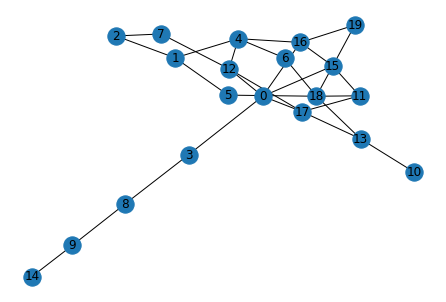

In [9]:
# hide an ugly deprecation warning
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import matplotlib.pyplot as plt


rand_adjacency = create_rand_adjacency(20)
graph = nx.from_numpy_matrix(rand_adjacency)
pos = nx.spring_layout(graph, seed=42)
nx.draw(graph, pos=pos, with_labels=True)

We can also solve the Max Cut problem for this graph and color the nodes.

In [10]:
result = solve_qubo(adjacency2qubo(rand_adjacency))
print(result)

(25.0, array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]))


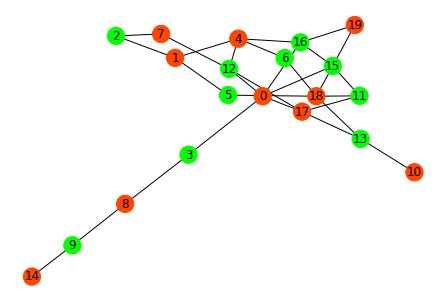

In [11]:
colors = []
for z in result[1]:
    if z == 0:
        colors.append('orangered')
    else:
        colors.append('lime')
nx.draw(graph, pos=pos, node_color=colors, with_labels=True)

Let's perform some benchmarks.

In [12]:
import time


times = []
for n in range(2, 25):
    # create the QUBO
    q = create_rand_qubo(n)
    # solve the optimization problem and stop the time
    start_time = time.time()
    solve_qubo(q)
    stop_time = time.time()
    times.append(stop_time - start_time)
    print('n = ', n, ', T = ', '{:9.5f}'.format(stop_time - start_time), sep='')

n = 2, T =   0.00034
n = 3, T =   0.00039
n = 4, T =   0.00016
n = 5, T =   0.00089
n = 6, T =   0.00063
n = 7, T =   0.00142
n = 8, T =   0.00203
n = 9, T =   0.00249
n = 10, T =   0.00674
n = 11, T =   0.00910
n = 12, T =   0.01936
n = 13, T =   0.03936
n = 14, T =   0.07531
n = 15, T =   0.15722
n = 16, T =   0.32510
n = 17, T =   0.61656
n = 18, T =   1.24131
n = 19, T =   2.60759
n = 20, T =   5.20079
n = 21, T =  10.49540
n = 22, T =  20.91954
n = 23, T =  42.72264
n = 24, T =  86.14681


Let's plot the results on a logarithmic scale.

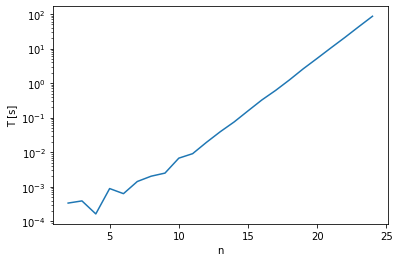

In [13]:
plt.plot(range(2, 25), times)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('T [s]')
plt.show()

We see that the execution time grows exponentially (straight line on logarithmic scale). The code for the solver is not optimized and only runs on one core on a small laptop. But you get an idea why this brute force method to solve the problem will not work for much larger problems.

# Exercise 2

(a) Write a function which checks if the result vector violates the constraint $z_1 = z_2$.

In [14]:
def is_z1_equal_z2(z):
    if z[0] == z[1]:
        return True
    else:
        return False

(b) Run the solver from Exercise 1.

In [15]:
l = 1
q_c = np.array([[2-l, -2*(1-l), -2,  0,  0],
                [  0,      2-l,  0, -2,  0],
                [  0,        0,  3, -2, -2],
                [  0,        0,  0,  3, -2],
                [  0,        0,  0,  0,  2]])
result = solve_qubo(q_c)
print(result, is_z1_equal_z2(result[1]))

(4, array([0, 0, 1, 1, 0])) True


The constraint is not violated. The solution looks like this:

![One possible solution](figures/max_cut_1_constraint_solution_res.png)

Consider the graph of Exercise 1 (d) with the additional constraints $z_1=z_2$, $z_7=z_8$, $z_1 \neq z_7$. Formulate the QUBO and solve the optimization problem.

For $z_i \neq z_j$, we can use the penalty term $\lambda(-2z_iz_j + z_i + z_j - 1)$. For $z_i = z_j$ this term becomes $-1$ and $0$ otherwise. The updated QUBO is:

In [16]:
l1 = 1
l2 = 1
l3 = 1
q2_c = np.array([[2-l1+l3, -2*(1-l1), -2,  0,  0,  0,   -2*l3,    0],
                 [      0,      2-l1, -2,  0,  0,  0,       0,    0],
                 [      0,         0,  3, -2,  0,  0,       0,    0],
                 [      0,         0,  0,  2,  0, -2,       0,    0],
                 [      0,         0,  0,  0,  2, -2,       0,   -2],
                 [      0,         0,  0,  0,  0,  4,      -2,   -2],
                 [      0,         0,  0,  0,  0,  0, 1-l2+l3, 2*l2],
                 [      0,         0,  0,  0,  0,  0,       0, 2-l2]])
print(q2_c)

[[ 2  0 -2  0  0  0 -2  0]
 [ 0  1 -2  0  0  0  0  0]
 [ 0  0  3 -2  0  0  0  0]
 [ 0  0  0  2  0 -2  0  0]
 [ 0  0  0  0  2 -2  0 -2]
 [ 0  0  0  0  0  4 -2 -2]
 [ 0  0  0  0  0  0  1  2]
 [ 0  0  0  0  0  0  0  1]]


In [17]:
def are_constraints_kept(z):
    if z[0] == z[1] and z[6] == z[7] and z[0] != z[6]:
        return True
    else:
        return False

In [18]:
result = solve_qubo(q2_c)
print(result, are_constraints_kept(result[1]))

(7, array([0, 0, 1, 0, 0, 0, 1, 1])) True


We find the following result:

![One possible solution](figures/max_cut_2_constraint_solution_res.png)

# Exercise 3

(b) Run the example code and compare the result with result from Exercise 1.

In [19]:
from collections import defaultdict
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite


# create a dictionary containing the non-zero elements of Q
def create_dict(q):
    n = q.shape[0]
    q_dict = defaultdict(int)
    for row in range(n):
        for col in range(n):
            if q[row, col] != 0:
                # negate the values of Q, since we have to minimize the objective function
                q_dict[row, col] = -q[row, col]
    return q_dict


chainstrength = 8
numruns = 10

sampler = EmbeddingComposite(DWaveSampler())
result = sampler.sample_qubo(create_dict(np.array(Q)),
                             chain_strength=chainstrength,
                             num_reads=numruns,
                             label='Max Cut n=5')

In [20]:
# print the results of all runs
for sample, energy in result.data(fields=['sample', 'energy']):
    print('Sample: ', sample, ', ', 'Energy: ', energy, sep='')

Sample: {0: 0, 1: 1, 2: 1, 3: 0, 4: 0}, Energy: -5.0
Sample: {0: 0, 1: 1, 2: 1, 3: 0, 4: 1}, Energy: -5.0
Sample: {0: 1, 1: 0, 2: 0, 3: 1, 4: 0}, Energy: -5.0
Sample: {0: 1, 1: 0, 2: 0, 3: 1, 4: 1}, Energy: -5.0


(c) Run the QUBO with the additional constraint.

In [21]:
result_c = sampler.sample_qubo(create_dict(q_c),
                             chain_strength=chainstrength,
                             num_reads=numruns,
                             label='Max Cut n=5 with Constraints')

In [22]:
for sample, energy in result_c.data(fields=['sample', 'energy']):
    print('Sample: ', sample, ', ', 'Energy:', energy, sep='')

Sample: {0: 1, 1: 1, 2: 0, 3: 0, 4: 1}, Energy:-4.0
Sample: {0: 1, 1: 0, 2: 0, 3: 1, 4: 1}, Energy:-4.0
Sample: {0: 0, 1: 0, 2: 1, 3: 1, 4: 0}, Energy:-4.0
Sample: {0: 0, 1: 1, 2: 1, 3: 0, 4: 0}, Energy:-4.0
Sample: {0: 1, 1: 0, 2: 0, 3: 1, 4: 0}, Energy:-4.0


(d) Run a large problem.

In [23]:
# n=500 can still be handled by the annealer, for n=1000 it was not possible to find a layout. For problems which
# are too large for the chip, there is also a hybrid solver, where the problem gets divided into smaller parts.
result_r = sampler.sample_qubo(create_dict(create_rand_qubo(500)),
                             chain_strength=chainstrength,
                             num_reads=1000,
                             label='Max Cut n=500')

Best solution: -651.0


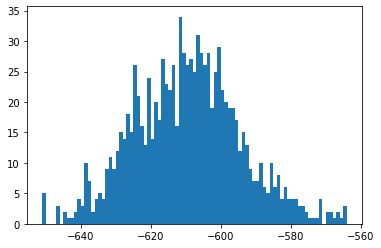

In [24]:
import matplotlib.pyplot as plt
# create a histogram of the results
energies = []
for sample, energy in result_r.data(fields=['sample', 'energy']):
    energies.append(energy)
plt.hist(energies, bins=range(int(min(energies)), int(max(energies)+1)))
print('Best solution:', min(energies))
plt.show()